In [1]:
%matplotlib inline
"""
Created on June,2017

@author: Juan Manuel Acevedo Valle
"""
import numpy as np
import matplotlib.pyplot as plt
 
from ipywidgets import HBox, VBox
import ipywidgets as widgets
from IPython import display
from vtpropy.utils.contact_functions import abs_sqrt as contact_function

In [2]:
datafile = '../data/dataset1.npz'

data = np.load(datafile)
af_train = data['af_train']
af_test = data['af_test']

prev_btn = widgets.Button(description=" << ", disabled=False)
idx_txt = widgets.IntText(description="")
next_btn = widgets.Button(description=" >> ", disabled=False)

tresh_txt = widgets.FloatText(description="Zero-Treshold:")

In [3]:
def prev_idx_callback(foo):
    idx_txt.value = idx_txt.get_interact_value() - 1

def next_idx_callback(foo):
    idx_txt.value = idx_txt.get_interact_value() + 1

def idx_callback(foo):
    display.clear_output(wait=True) #wait=True
    index = idx_txt.get_interact_value()
    treshold = tresh_txt.get_interact_value()
#     print(index)
    fig, ax = plt.subplots(2,1)
    plt.sca(ax[0])
    plt.plot(af_train[index,:])
    plt.sca(ax[1])
    plt.plot(contact_function(af_train[index,:],treshold))
    plt.show()

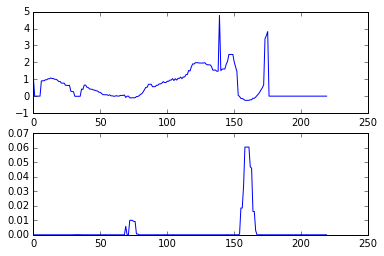

In [4]:
prev_btn.on_click(prev_idx_callback)
next_btn.on_click(next_idx_callback)
idx_txt.observe(idx_callback) # Calls the function 3 time per interaction
tresh_txt.observe(idx_callback)
display.display(HBox([prev_btn, idx_txt, next_btn, tresh_txt]))
idx_callback(0)